In [2]:
from pinotdb import connect

In [3]:
conn = connect(host='localhost', port=9000, path='/sql', scheme='http')

In [4]:
curs = conn.cursor()

In [9]:
import pandas as pd

curs.execute("""
select author, title, count(*) changes from wiki
where published_mil > now() - 1*60*1000
group by author, title
order by changes desc
limit 10
""")

df = pd.DataFrame(curs,
                 columns=[item[0] for item in curs.description])
df

,author,title,changes
0,Bruxton,Template:Did you know nominations/Kantibhai Patel,2
1,Charles Essie,Category:20 July plot,2
2,2607:FEA8:A461:4500:70A1:169F:B02F:CF1A,Yogi Ferrell,2
3,Battalion of allah,Draft:Musab Al-Adani,2
4,Dominus Moravian,Category:1989 disestablishments in Yugoslavia,1
5,Srnec,Category:Short description is different from W...,1
6,Llammakey,Category:Use mdy dates from December 2023,1
7,Smasongarrison,Category:People by nationality and occupation,1
8,FireDragonValo,Disobey,1
9,Brightkingdom,Marand County,1


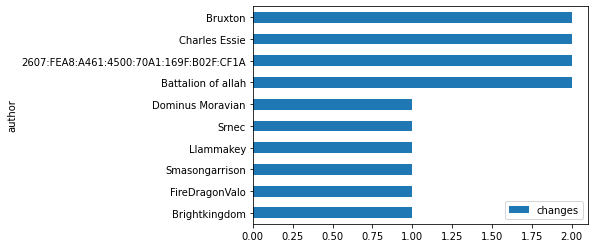

In [10]:
hist = df.plot.barh("author", "changes")
hist.invert_yaxis()


In the cell below, you'll see an example of how to dynamically update a chart.

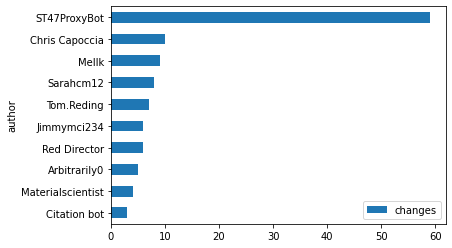

In [14]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def data():
    curs.execute("""
    select author, count(*) changes from wiki
    where published_mil > now() - 1*60*1000
    group by author
    order by changes desc
    limit 10
    """)

    return pd.DataFrame(curs, columns=[item[0] for item in curs.description])


import threading
def build(refresh:int=5):
    hist = data().plot.barh("author", "changes")
    hist.invert_yaxis()
    
    display(hist)
    
    clear_output(wait = True)
    plt.pause(0.5)
    threading.Timer(refresh, build, [refresh]).start()
    
build()
